In [1]:
import os
from tqdm import tqdm
import cv2    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from SwarmPackagePy import wsa, pso
from prettytable import PrettyTable
import pyswarms as ps

### Ackley Function

In [3]:

def ackley_function(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    n = len(x)
    return -a * np.exp(-b * np.sqrt(sum1 / n)) - np.exp(sum2 / n) + a + np.exp(1)

def sensitivity_analysis_wsa(dimension):
    table = PrettyTable()
    table.field_names = ["Algorithm", "ro0", "eta", "Best Position", "Best Fitness"]


    num_whales = 30
    dim = dimension
    max_iterations = 100

    for ro0 in [1.0, 2.0, 3.0]:
        for eta in [0.005, 0.01, 0.05, 0.1, 0.5]:
            best_fitness = [0, np.inf]
            for _ in range(5):
                w = wsa(num_whales, ackley_function, -100, 100, dimension=dim, iteration=max_iterations, ro0=ro0, eta=eta)
                if ackley_function(np.array(w.get_Gbest())) < best_fitness[1]:
                    best_fitness[0] = w.get_Gbest()
                    best_fitness[1] = ackley_function(np.array(w.get_Gbest()))
            #print(f'WSO with ro0={ro0}, eta={eta}: {w.get_Gbest()} -> {ackley_function(np.array(w.get_Gbest()))}')
            table.add_row(["WSO", ro0, eta, best_fitness[0],best_fitness[1]])

    print(table)

def sensitivity_analysis_pso(dimension):

    num_particles = 30

    table2 = PrettyTable()
    table2.field_names = ["Algorithm", "inertia", "cognitive", "social", "Best Position", "Best Fitness"]


    for inertia_weight in [0.3, 0.5, 0.7]:
        for cognitive_param in [1.0, 1.5, 2.0]:
            for social_param in [1.0, 1.5, 2.0]:
                options = {'c1': cognitive_param, 'c2': social_param, 'w': inertia_weight}
                best_fitness = [0, np.inf]
                for _ in range(5):
                    optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=dimension, options=options)
                    cost, pos = optimizer.optimize(ackley_function, iters=100) 
                    if cost < best_fitness[1]:
                        best_fitness[0] = pos
                        best_fitness[1] = cost               
                #print(f'PSO with inertia={inertia_weight}, cognitive={cognitive_param}, social={social_param}: {cost}')
                table2.add_row(["PSO", inertia_weight, cognitive_param, social_param, pos, cost])

    print(table2)



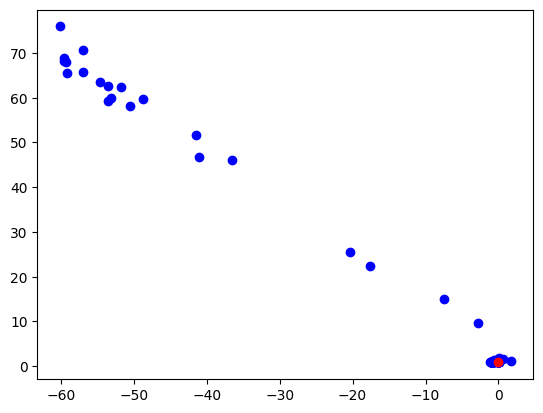

In [66]:
w = wsa(30, ackley_function, -100, 100, dimension=2, iteration=100, ro0=2.0, eta=0.01)
for x in w.get_agents():
    plt.scatter(x[0][0], x[0][1], color='blue')
    #print(f'{x[0]} -> {ackley_function(np.array(x[0]))}')
best = w.get_Gbest()
plt.scatter(best[0], best[1], color='red')

In [4]:
sensitivity_analysis_wsa(2)

+-----------+-----+-------+----------------------------------------------------+------------------------+
| Algorithm | ro0 |  eta  |                   Best Position                    |      Best Fitness      |
+-----------+-----+-------+----------------------------------------------------+------------------------+
|    WSO    | 1.0 | 0.005 |   [-0.0014480679365827204, 0.014566297705784444]   |  0.04709855061939949   |
|    WSO    | 1.0 |  0.01 |     [-0.8933196715714681, 0.04214445389943053]     |   2.696940143642881    |
|    WSO    | 1.0 |  0.05 |       [-7.024296988438002, 8.02313471428308]       |   15.603171466346252   |
|    WSO    | 1.0 |  0.1  |      [14.055283049007471, 6.066510063194564]       |   17.896003601627104   |
|    WSO    | 1.0 |  0.5  |     [-3.0345142113127395, 2.6654205045917934]      |   10.156403093628745   |
|    WSO    | 2.0 | 0.005 |  [1.3562462814129727e-09, 1.0237253395621077e-08]  | 2.9208326868257473e-08 |
|    WSO    | 2.0 |  0.01 | [-3.33021682023616

In [7]:
sensitivity_analysis_wsa(3)

+-----------+-----+-------+---------------------------------------------------------------------------+------------------------+
| Algorithm | ro0 |  eta  |                               Best Position                               |      Best Fitness      |
+-----------+-----+-------+---------------------------------------------------------------------------+------------------------+
|    WSO    | 1.0 | 0.005 |       [-2.2244676488933384, -2.2656944097385465, 1.9977108453619596]      |   8.324861414319919    |
|    WSO    | 1.0 |  0.01 |        [9.792267582983126, 2.9429977920326693, -2.0024367421379217]       |   14.631828135142545   |
|    WSO    | 1.0 |  0.05 |       [10.970501378835129, -15.005671432076664, -3.980281348104259]       |   17.79585792832651    |
|    WSO    | 1.0 |  0.1  |        [4.947144692720261, -4.217379209067148, 14.032157826531387]        |   17.331778411210546   |
|    WSO    | 1.0 |  0.5  |       [-15.15718430682766, -5.759728585942298, -1.9738993225399923]  

In [8]:
sensitivity_analysis_pso(2)

2023-11-19 13:29:21,862 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.0, 'c2': 1.0, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.61
2023-11-19 13:29:21,965 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.607005466764275, best pos: [ 0.47570527 -0.06615036]
2023-11-19 13:29:21,974 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.0, 'c2': 1.0, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=4.77
2023-11-19 13:29:22,071 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.774098728606383, best pos: [0.65612695 0.9334538 ]
2023-11-19 13:29:22,084 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.0, 'c2': 1.0, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=4.8
2023-11-19 13:29:22,187 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.801025757629883, b

+-----------+---------+-----------+--------+---------------------------+---------------------+
| Algorithm | inertia | cognitive | social |       Best Position       |     Best Fitness    |
+-----------+---------+-----------+--------+---------------------------+---------------------+
|    PSO    |   0.3   |    1.0    |  1.0   |  [0.39202388 0.97991452]  |  4.787299070786659  |
|    PSO    |   0.3   |    1.0    |  1.5   |  [0.3202193  0.15107241]  |   2.65829484714228  |
|    PSO    |   0.3   |    1.0    |  2.0   |  [0.6627839  0.42263767]  |  4.577299796393149  |
|    PSO    |   0.3   |    1.5    |  1.0   |  [0.50835509 0.90559884]  |  4.823975866385155  |
|    PSO    |   0.3   |    1.5    |  1.5   | [-0.06988541  0.06606693] | -3.0919130869951803 |
|    PSO    |   0.3   |    1.5    |  2.0   |  [0.68307203 0.17420064]  |  4.048979297177425  |
|    PSO    |   0.3   |    2.0    |  1.0   | [ 0.63649584 -0.15478945] |  3.7828995900137667 |
|    PSO    |   0.3   |    2.0    |  1.5   |  [0.5

In [9]:
sensitivity_analysis_pso(3)

2023-11-19 13:29:53,788 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.0, 'c2': 1.0, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.05
2023-11-19 13:29:53,878 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.051100554715063, best pos: [0.92005498 0.26507285 0.4611714 ]
2023-11-19 13:29:53,885 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.0, 'c2': 1.0, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.64
2023-11-19 13:29:53,985 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.640325841741998, best pos: [0.70503261 0.57449678 0.63966668]
2023-11-19 13:29:53,992 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.0, 'c2': 1.0, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.45
2023-11-19 13:29:54,086 - pyswarms.single.global_best - INFO - Optimization finished | best cost:

+-----------+---------+-----------+--------+---------------------------------------+---------------------+
| Algorithm | inertia | cognitive | social |             Best Position             |     Best Fitness    |
+-----------+---------+-----------+--------+---------------------------------------+---------------------+
|    PSO    |   0.3   |    1.0    |  1.0   |   [0.63550739 0.15892478 0.96668819]  |  5.459904027324146  |
|    PSO    |   0.3   |    1.0    |  1.5   | [-0.01939568  0.50060302  0.87395607] |   4.34785360125851  |
|    PSO    |   0.3   |    1.0    |  2.0   | [ 0.43843034  0.59362901 -0.34192873] |  5.284725379686471  |
|    PSO    |   0.3   |    1.5    |  1.0   | [-0.24620572  0.5830374   0.20894082] |  4.018629251992152  |
|    PSO    |   0.3   |    1.5    |  1.5   |   [0.36875007 0.78870052 0.24482594]  |  5.022026075655155  |
|    PSO    |   0.3   |    1.5    |  2.0   | [-0.13633765  0.850423    0.0676423 ] | -2.9191658342649762 |
|    PSO    |   0.3   |    2.0    |  

### Data Upload

In [2]:
train_path = 'trafficnet_dataset_v1/train'
test_path = 'trafficnet_dataset_v1/test'

In [3]:
class_names = ['accident', 'dense_traffic', 'fire', 'sparse_traffic']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

no_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data(dataset):
    images = []
    labels = []

    if os.path.exists(dataset) and os.path.isdir(dataset): 
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            # itteration through immages in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                if isinstance(image, np.ndarray):
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, IMAGE_SIZE) 
                        
                    #append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
            print(len(images))
        images = np.array(images, dtype = 'int32')
        labels = np.array(labels, dtype = 'int32')
        return (images, labels)
    else: return print("Folder does not exist")

In [5]:
(training_img, training_labels) = load_data(train_path)
(test_img, test_labels) = load_data(test_path)

100%|██████████| 900/900 [00:01<00:00, 758.85it/s]


900


100%|██████████| 900/900 [00:01<00:00, 782.95it/s]


1800


100%|██████████| 900/900 [00:01<00:00, 839.70it/s]


2700


100%|██████████| 901/901 [00:00<00:00, 1002.72it/s]


3600


100%|██████████| 200/200 [00:00<00:00, 780.48it/s]


200


100%|██████████| 200/200 [00:00<00:00, 788.44it/s]


400


100%|██████████| 200/200 [00:00<00:00, 830.87it/s]


600


100%|██████████| 200/200 [00:00<00:00, 831.59it/s]

800


In [6]:
from sklearn.utils import shuffle

training_img = training_img / 255.0 
test_img = test_img / 255.0

training_img_shuffle, training_labels_shuffle = shuffle(training_img, training_labels, random_state=21)


Creating batches of data

In [7]:
import random
def create_sample(dataset, labels, batch_size):  # equal sizes of classes
    size = batch_size // no_classes
    random_indexes = []
    for i in range(no_classes):
        random_indexes.append(random.sample(range(i*900, (i+1)*900), size))
    random_indexes = shuffle(np.array(random_indexes).flatten(), random_state=21)
    batch_images = []
    batch_labels = []
    for i in random_indexes:
        batch_images.append(dataset[i])
        batch_labels.append(labels[i])
    return np.array(batch_images), np.array(batch_labels)

Hyperparameters to optimize:
- Number of convolutional layers [1, 2, 3, 5, 7, 10, 12, 15] (paired with normalization and max pooling layers)
- Number of filters per layer [2, 4, 8, 16, 32, 64, 128, 256]
- Batch size [32, 64, 128, 256]

In [14]:
layers = [1,2,3,4,5,6]
filters = [4,8,16,32,64,128]
batch_sizes = [32,64,128]

In [15]:
history = []

In [22]:
def fitness_check(x):
    print(f"check {x}")
    layer = layers[round(x[0]-0.5)]
    filter = filters[round(x[1]-0.5)]
    batch_size = batch_sizes[round(x[2]/2.0-0.5)]

    model = tf.keras.models.Sequential()
    for i in range(layer):
        if i == 0:
            model.add(tf.keras.layers.Conv2D(filters=filter, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
        else:
            model.add(tf.keras.layers.Conv2D(filters=filter, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    data_img, data_labels = create_sample(training_img, training_labels, 1200)

    network = model.fit(data_img, data_labels, epochs=5, batch_size=batch_size)

    test_loss, test_acc = model.evaluate(test_img, test_labels)

    history.append([layer, filter, batch_size, test_acc, test_loss])

    return 1-test_acc
    

In [24]:
w = wsa(10, fitness_check, 0, 6, dimension=3, iteration=100, ro0=0.005, eta=3.0)
best = w.get_Gbest()
best_accuracy = fitness_check(np.array(best))

print(f'Best accuracy: {best_accuracy} for {best}')

check [4.39434087 0.98091484 1.48018773]
Epoch 1/5
38/38 [==============================] - 16s 372ms/step - loss: 3.9421 - accuracy: 0.4342
Epoch 2/5
38/38 [==============================] - 14s 356ms/step - loss: 1.3021 - accuracy: 0.7200
Epoch 3/5
38/38 [==============================] - 14s 357ms/step - loss: 0.4618 - accuracy: 0.8608
Epoch 4/5
38/38 [==============================] - 14s 355ms/step - loss: 0.1438 - accuracy: 0.9500
Epoch 5/5
25/25 [==============================] - 2s 64ms/step - loss: 3.7924 - accuracy: 0.2500
check [0.77845035 1.37361785 3.18599114]
Epoch 1/5
19/19 [==============================] - 3s 154ms/step - loss: 2.0523 - accuracy: 0.4625
Epoch 2/5
19/19 [==============================] - 3s 151ms/step - loss: 0.5628 - accuracy: 0.8125
Epoch 3/5
19/19 [==============================] - 3s 152ms/step - loss: 0.1988 - accuracy: 0.9375
Epoch 4/5
19/19 [==============================] - 3s 152ms/step - loss: 0.0655 - accuracy: 0.9833
Epoch 5/5
25/25 [=======

KeyboardInterrupt: 

In [25]:
history

[[1, 8, 64, 0.5587499737739563, 1.0860943794250488],
 [1, 4, 64, 0.5924999713897705, 1.135055661201477],
 [4, 32, 128, 0.26499998569488525, 5.748129367828369],
 [1, 64, 64, 0.4112499952316284, 2.0188660621643066],
 [1, 64, 128, 0.4987500011920929, 1.114632248878479],
 [6, 64, 32, 0.30250000953674316, 87.2704849243164],
 [5, 128, 32, 0.38374999165534973, 49.782047271728516],
 [6, 8, 64, 0.26499998569488525, 2.3628389835357666],
 [4, 8, 32, 0.3050000071525574, 2.3149545192718506],
 [4, 4, 32, 0.3700000047683716, 1.9851793050765991],
 [5, 8, 64, 0.2574999928474426, 1.4734110832214355],
 [1, 4, 64, 0.5337499976158142, 1.1734882593154907],
 [1, 4, 64, 0.5837500095367432, 1.1207795143127441],
 [4, 32, 128, 0.32124999165534973, 4.4817280769348145],
 [1, 4, 64, 0.550000011920929, 1.1243430376052856],
 [1, 64, 64, 0.41499999165534973, 1.2726807594299316],
 [1, 4, 64, 0.45375001430511475, 1.1987186670303345],
 [1, 64, 128, 0.3799999952316284, 2.518796443939209],
 [1, 4, 64, 0.5024999976158142, 1

In [26]:
best = 0
for i in history:
    if i[3] > best:
        best = i[3]
        best_params = i
print(f'Best accuracy: {best} for {best_params[0]} convolutional layers, {best_params[1]} filters and {best_params[2]} batch size')


Best accuracy: 0.625 for 1 convolutional layers, 8 filters and 64 batch size


In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3), padding = 'same'),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(4, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
network = model.fit(training_img_shuffle, training_labels_shuffle, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
45/45 [==============================] - 25s 549ms/step - loss: 0.0327 - accuracy: 0.9951 - val_loss: 0.0769 - val_accuracy: 0.9972
Epoch 2/5
45/45 [==============================] - 22s 485ms/step - loss: 0.0621 - accuracy: 0.9892 - val_loss: 0.1020 - val_accuracy: 0.9861
Epoch 3/5
45/45 [==============================] - 21s 476ms/step - loss: 0.0496 - accuracy: 0.9944 - val_loss: 0.0772 - val_accuracy: 0.9903
Epoch 4/5
45/45 [==============================] - 21s 462ms/step - loss: 0.0267 - accuracy: 0.9958 - val_loss: 0.0775 - val_accuracy: 0.9944
Epoch 5/5
45/45 [==============================] - 21s 456ms/step - loss: 0.0293 - accuracy: 0.9965 - val_loss: 0.2176 - val_accuracy: 0.9472


In [38]:
test_predct = model.evaluate(test_img, test_labels)

25/25 [==============================] - 1s 53ms/step - loss: 2.4316 - accuracy: 0.6363


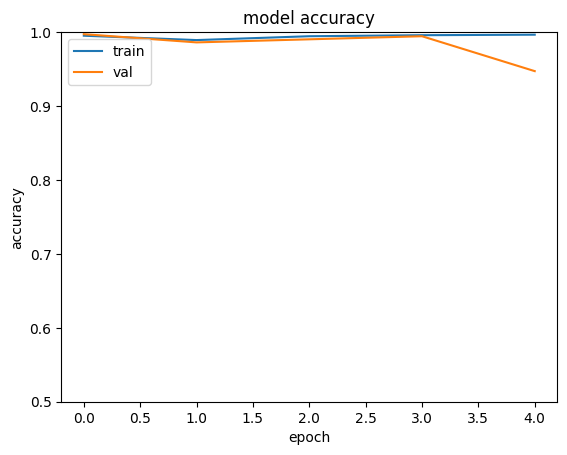

In [40]:
plt.plot(network.history['accuracy'])
plt.plot(network.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.5, 1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
predictions = model.predict(test_img)

25/25 [==============================] - 2s 59ms/step


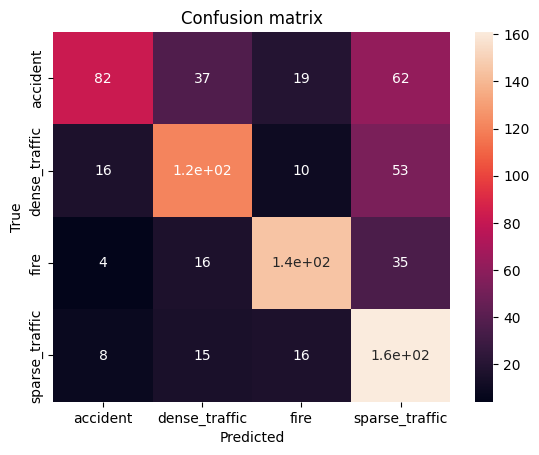

In [42]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_labels, np.argmax(predictions, axis = 1))
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()